In [47]:
import random
import geopandas
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [48]:
openFile = geopandas.read_file("D:/GIS/example_dataset.geojson")

### Count of sowing_date

In [49]:
substring = "-04-"
counter = Counter(openFile['sowing_date'])
counter_elements = 0

for data in list(counter):
    if substring in data:
        del counter[data]

for i in counter.elements():
    counter_elements = counter_elements + 1

print(counter, '\nCount of sowing_date ->', counter_elements)

Counter({'2018-05-01': 42, '2018-05-02': 27, '2017-05-06': 26, '2017-05-05': 23, '2017-05-04': 22, '2017-05-02': 21, '2017-05-03': 21, '2017-05-07': 20, '2017-05-09': 16, '2017-05-10': 16, '2018-05-04': 16, '2018-05-03': 15, '2017-05-01': 12, '2018-05-05': 11, '2017-05-11': 10, '2016-05-05': 9, '2016-05-06': 9, '2017-05-15': 8, '2017-05-16': 7, '2016-05-09': 6, '2017-05-17': 6, '2018-05-08': 6, '2018-05-09': 6, '2016-05-07': 5, '2016-05-04': 5, '2016-05-08': 5, '2016-05-02': 4, '2016-05-03': 4, '2016-05-10': 4, '2016-05-23': 4, '2017-05-12': 4, '2017-05-13': 4, '2017-05-20': 4, '2017-05-18': 3, '2018-05-07': 3, '2016-05-21': 2, '2018-05-06': 2, '2016-03-17': 2, '2016-03-30': 2, '2017-05-08': 1, '2018-05-15': 1, '2016-06-13': 1, '2017-05-14': 1, '2017-05-21': 1, '2017-05-22': 1, '2018-05-10': 1, '2016-03-18': 1, '2016-03-19': 1}) 
Count of sowing_date -> 421


### New field - error
### Max/min value of error

In [50]:
openFile['error'] = abs(openFile['actual_yield'] - (openFile['model_yield'] / openFile['actual_yield']))
print(openFile.loc[openFile["error"].idxmax()])
print('--------')
print(openFile.loc[openFile["error"].idxmin()])

crop_name                                                       maiz
sowing_date                                               2018-04-23
actual_yield                                                 14500.0
field_id                                                MS_VN_03_205
avg_temperature                                            13.204197
avg_rainfall                                              643.851488
model_yield                                                   8096.0
geometry           MULTIPOLYGON (((28.405359888900804 49.06401641...
error                                                   14499.441655
Name: 450, dtype: object
--------
crop_name                                                        soy
sowing_date                                               2017-04-27
actual_yield                                                   900.0
field_id                                                MS_VN_02_502
avg_temperature                                            11.554349


### Centroid

In [51]:
change = openFile['geometry'].to_crs(crs=3857)
openFile['centroid'] = change.centroid. to_crs(crs=4326)
openFile.head(5)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,error,centroid
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",7598.828553,POINT (28.16355 49.21292)
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",7898.884304,POINT (28.15958 49.20348)
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",7898.947215,POINT (27.29955 48.87375)
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",8999.013556,POINT (28.12311 49.20752)
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",12099.256529,POINT (28.85473 49.21875)


### Area

In [65]:
area = openFile.to_crs(epsg=32635)
openFile['area'] = area.area
openFile.head(5)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,error,centroid,area
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",7598.828553,POINT (28.16355 49.21292),3.165564e+05
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",7898.884304,POINT (28.15958 49.20348),2.142645e+06
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",7898.947215,POINT (27.29955 48.87375),2.192922e+05
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",8999.013556,POINT (28.12311 49.20752),6.221234e+05
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",12099.256529,POINT (28.85473 49.21875),1.195530e+06


### Scatter of actual_yield/avg_temperature

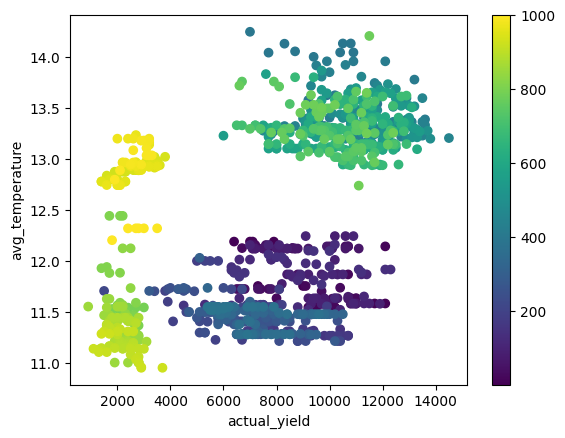

In [53]:
colors = list(range(1, 1001))

for color in colors:
    color = random.randint(0, 100)

plt.scatter(openFile['actual_yield'], openFile['avg_temperature'], c=colors, cmap='viridis')
plt.xlabel('actual_yield')
plt.ylabel('avg_temperature')
plt.colorbar()

plt.show()

### Scatter of actual_yield/avg_rainfall

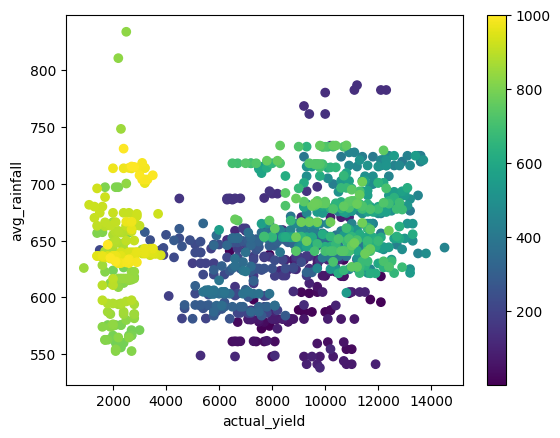

In [54]:
colors = list(range(1, 1001))

for color in colors:
    color = random.randint(0, 100)

plt.scatter(openFile['actual_yield'], openFile['avg_rainfall'], c=colors, cmap='viridis')
plt.xlabel('actual_yield')
plt.ylabel('avg_rainfall')
plt.colorbar()

plt.show()

In [ ]:
openFile.to_file('../updated_dataset.geojson', driver='GeoJson')